Load Dataset

In [181]:
# load library needed
import pandas as pd
import numpy as np

In [182]:
missing_values = ["n/a", "na", "--"] # add custom missing values

In [183]:
df = pd.read_csv("covid_19_indonesia_time_series_all.csv",na_values=missing_values)

In [184]:
## Select only numeric features
df_train_num = df.select_dtypes(include= np.number)

In [185]:
df_train_num.info() # show dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   New Cases                    31822 non-null  int64  
 1   New Deaths                   31822 non-null  int64  
 2   New Recovered                31822 non-null  int64  
 3   New Active Cases             31822 non-null  int64  
 4   Total Cases                  31822 non-null  int64  
 5   Total Deaths                 31822 non-null  int64  
 6   Total Recovered              31822 non-null  int64  
 7   Total Active Cases           31822 non-null  int64  
 8   City or Regency              0 non-null      float64
 9   Total Regencies              31822 non-null  int64  
 10  Total Cities                 30921 non-null  float64
 11  Total Districts              31822 non-null  int64  
 12  Total Urban Villages         30918 non-null  float64
 13  Total Rural Vill

In [186]:
df_train_num.isnull().sum() # show number of missing values

New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
City or Regency                31822
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
Longitude                          0
Latitude                           0
New Cases per Million              0
Total Cases per Million            0
New Deaths per Million             0
Total Deaths per Million           0
Total Deaths per 100rb             0
Growth Factor of New Cases      1939
Growth Factor of New Deaths     3447
dtype: int64

In [187]:
df_train_num['City or Regency'].value_counts() # semua value terlihat invalid meskipun tipenya numerik

Series([], Name: City or Regency, dtype: int64)

In [188]:
df_train_num.drop(columns="City or Regency",inplace=True) # drop column "City or Regency"

<AxesSubplot:>

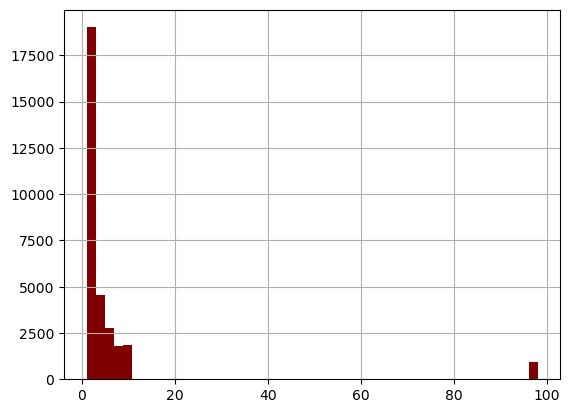

In [189]:
total_cities = df_train_num["Total Cities"]
total_cities.hist(bins=50, color='maroon') # ter    ihat right skewed

<AxesSubplot:>

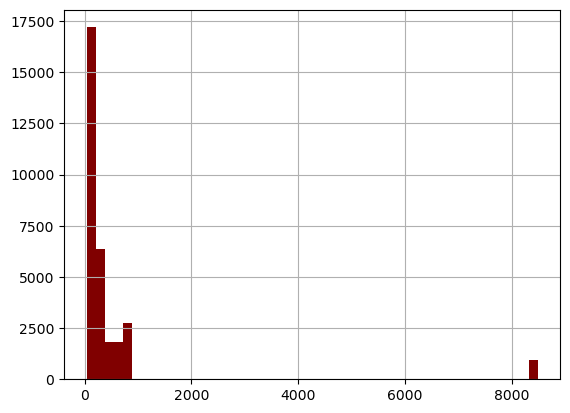

In [190]:
total_urban_village = df_train_num["Total Urban Villages"]
total_urban_village.hist(bins=50, color='maroon') # terlihat right skewed

<AxesSubplot:>

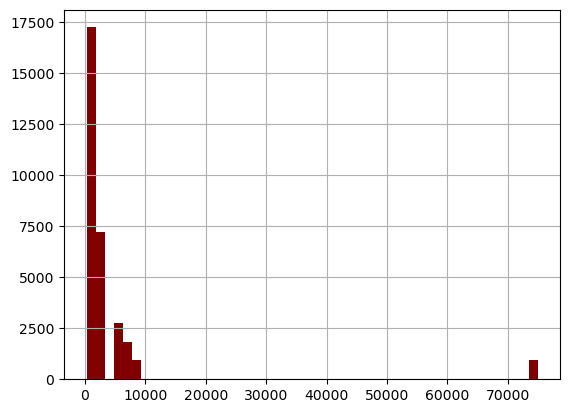

In [191]:
total_rural_village = df_train_num["Total Rural Villages"]
total_rural_village.hist(bins=50, color='maroon') # terlihat right skewed

<AxesSubplot:>

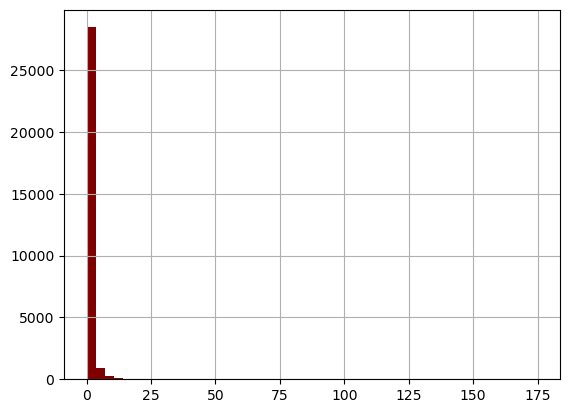

In [192]:
gf_new_cases = df_train_num["Growth Factor of New Cases"]
gf_new_cases.hist(bins=50, color='maroon') # terlihat right skewed

<AxesSubplot:>

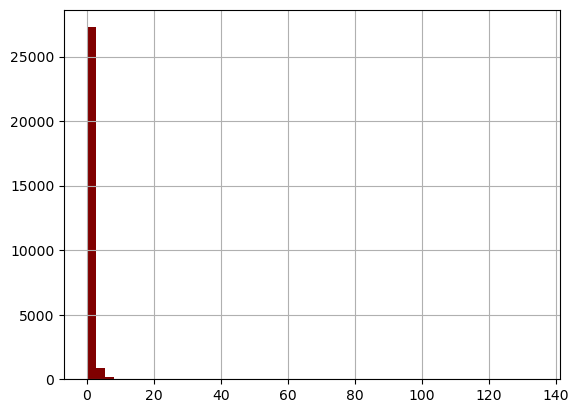

In [193]:
gf_new_deaths = df_train_num["Growth Factor of New Deaths"]
gf_new_deaths.hist(bins=50, color='maroon') # terlihat right skewed

Semua features terlihat right skewed maka missing values akan diisi dengan nilai median

In [194]:
# show dataset before handling missing values
df_train_num.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,31822.000000,30921.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,24.027277,5.835840,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,68.359734,16.390123,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,1.000000,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,7.000000,1.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,11.000000,2.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,18.000000,4.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,416.000000,98.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [195]:
# Handling Missing Values using Median because of right skewness in every features
df_train_num['Total Cities'] = total_cities.fillna(total_cities.median())
df_train_num['Total Urban Villages'] = total_urban_village.fillna(total_urban_village.median())
df_train_num['Total Rural Villages'] = total_rural_village.fillna(total_rural_village.median())
df_train_num['Growth Factor of New Cases'] = gf_new_cases.fillna(gf_new_cases.median())
df_train_num['Growth Factor of New Deaths'] = gf_new_deaths.fillna(gf_new_deaths.median())

In [196]:
df_train_num.isnull().sum() # no more missing values

New Cases                      0
New Deaths                     0
New Recovered                  0
New Active Cases               0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Total Active Cases             0
Total Regencies                0
Total Cities                   0
Total Districts                0
Total Urban Villages           0
Total Rural Villages           0
Area (km2)                     0
Population                     0
Population Density             0
Longitude                      0
Latitude                       0
New Cases per Million          0
Total Cases per Million        0
New Deaths per Million         0
Total Deaths per Million       0
Total Deaths per 100rb         0
Growth Factor of New Cases     0
Growth Factor of New Deaths    0
dtype: int64

Menghitung central tendency dari dataset (mean, median, mode)

In [197]:
df_train_num.mean() # show mean values for every feature

New Cases                      4.023114e+02
New Deaths                     9.920652e+00
New Recovered                  3.903985e+02
New Active Cases               1.992238e+00
Total Cases                    1.594500e+05
Total Deaths                   4.564753e+03
Total Recovered                1.492615e+05
Total Active Cases             5.623782e+03
Total Regencies                2.402728e+01
Total Cities                   5.727233e+00
Total Districts                4.179523e+02
Total Urban Villages           4.961247e+02
Total Rural Villages           4.378663e+03
Area (km2)                     1.106532e+05
Population                     1.536766e+07
Population Density             7.388949e+02
Longitude                      1.137005e+02
Latitude                      -2.725681e+00
New Cases per Million          2.813329e+01
Total Cases per Million        1.148504e+04
New Deaths per Million         6.403083e-01
Total Deaths per Million       2.896336e+02
Total Deaths per 100rb         2

In [198]:
df_train_num.median() # show median values for every features

New Cases                      2.700000e+01
New Deaths                     0.000000e+00
New Recovered                  2.000000e+01
New Active Cases               0.000000e+00
Total Cases                    2.359650e+04
Total Deaths                   5.655000e+02
Total Recovered                2.102750e+04
Total Active Cases             5.570000e+02
Total Regencies                1.100000e+01
Total Cities                   2.000000e+00
Total Districts                1.690000e+02
Total Urban Villages           1.750000e+02
Total Rural Villages           1.591000e+03
Area (km2)                     4.201300e+04
Population                     4.216171e+06
Population Density             1.038400e+02
Longitude                      1.134177e+02
Latitude                      -2.461746e+00
New Cases per Million          5.710000e+00
Total Cases per Million        6.804285e+03
New Deaths per Million         0.000000e+00
Total Deaths per Million       1.584150e+02
Total Deaths per 100rb         1

In [199]:
df_train_num.mode() # dataset looks like bimodal

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,12.0,2.0,...,138.34,106.836118,-6.204699,0.0,11775.71,0.0,0.0,0.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16334.31,113.921327,-0.789275,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
df_train_num.var() # finding variance from dataset

New Cases                      5.385323e+06
New Deaths                     4.113822e+03
New Recovered                  4.839467e+06
New Active Cases               1.487213e+06
Total Cases                    3.924314e+11
Total Deaths                   3.130681e+08
Total Recovered                3.550415e+11
Total Active Cases             8.143839e+08
Total Regencies                4.673053e+03
Total Cities                   2.614346e+02
Total Districts                1.423237e+06
Total Urban Villages           1.967850e+06
Total Rural Villages           1.539367e+08
Area (km2)                     1.016248e+11
Population                     1.990689e+15
Population Density             7.449797e+06
Longitude                      9.726039e+01
Latitude                       1.301813e+01
New Cases per Million          5.521933e+03
Total Cases per Million        2.715042e+08
New Deaths per Million         3.736552e+00
Total Deaths per Million       1.320804e+05
Total Deaths per 100rb         1

In [201]:
df_train_num.describe() #summary data distribution

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,31822.000000,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,24.027277,5.727233,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.306883,1.030169
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,68.359734,16.168939,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.597639,1.276486
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,1.000000,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,7.000000,1.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.670000,0.880000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,11.000000,2.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,18.000000,4.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.250000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,416.000000,98.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000
